## Titanic Dataset For Kaggle Competition

In [1]:
import os
import sklearn
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Run The Below Two Cells To Download The Titanic Dataset From Kaggle (Requires API Key)

In [3]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# api = KaggleApi()
# api.authenticate()

# api.competition_download_files("titanic", path=".", quiet=False)

# # Unzip it
# with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
#     zip_ref.extractall("titanic_data")

# # Remove the zip file
# os.remove("titanic.zip")

In [5]:
train_df = pd.read_csv("titanic_data/train.csv")
test_df = pd.read_csv("titanic_data/test.csv")

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

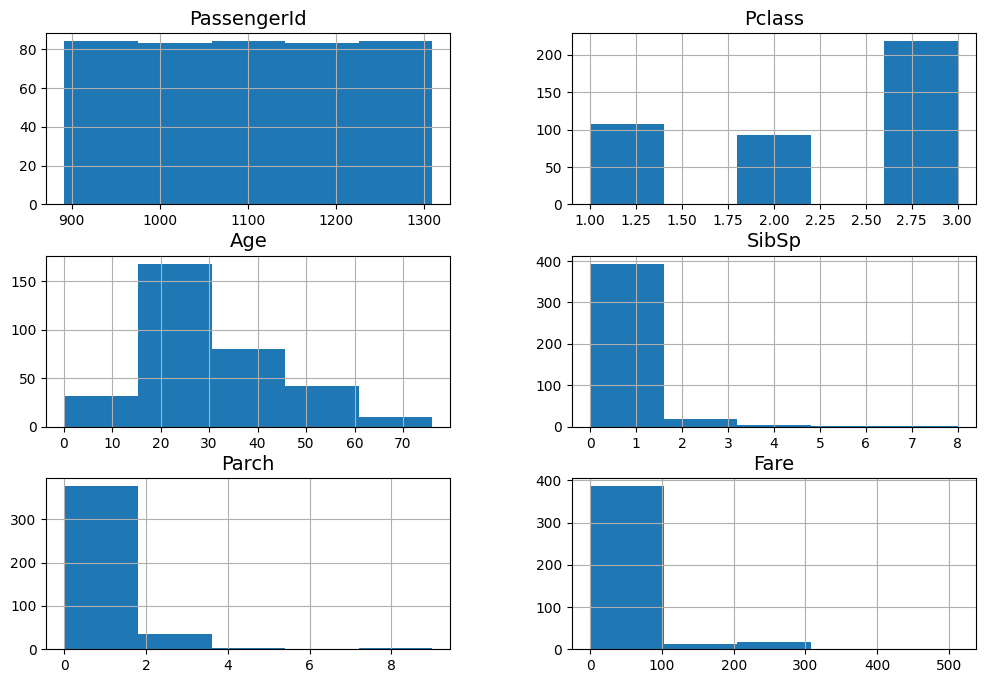

In [13]:
test_df.hist(bins=5, figsize=(12, 8))
plt.show()

In [14]:
corr_matrix = train_df.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

          mean  count
Deck                 
D     0.757576     33
E     0.750000     32
B     0.744681     47
F     0.615385     13
C     0.593220     59
G     0.500000      4
A     0.466667     15
U     0.299854    687
T     0.000000      1


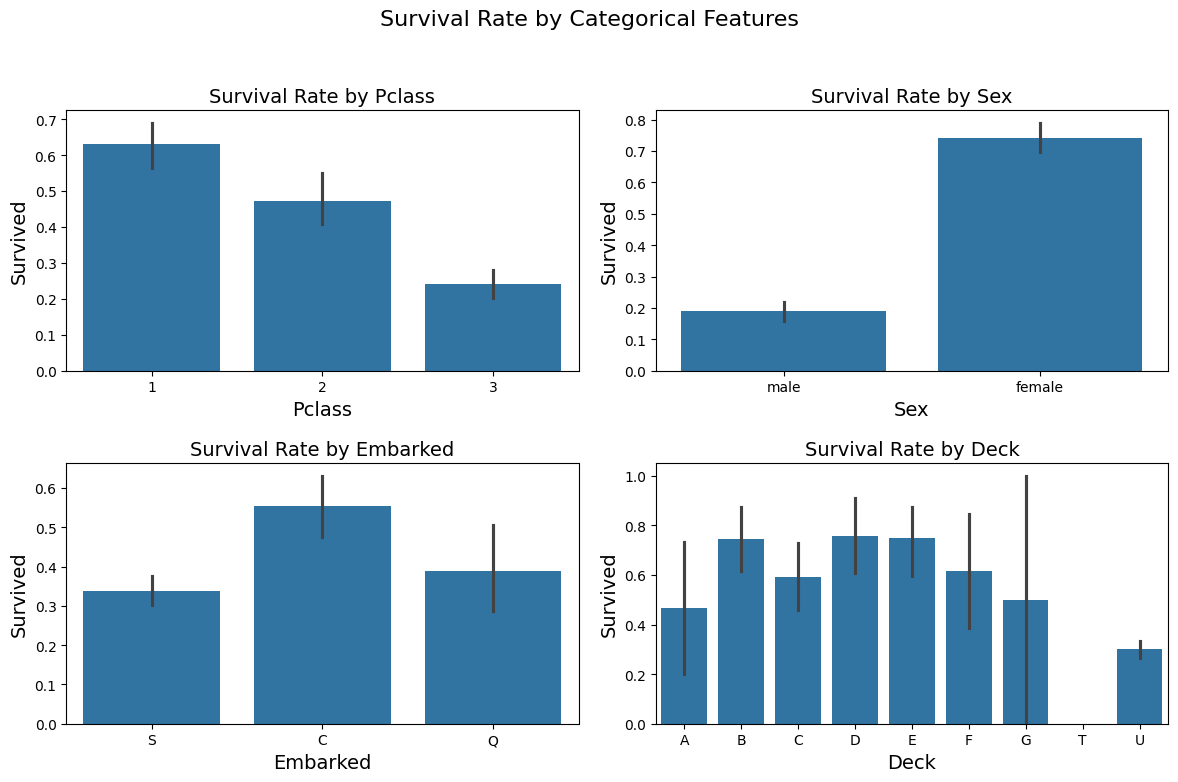

In [15]:
train_dfC = train_df.copy()

if 'Deck' not in train_dfC.columns:
    train_dfC['Deck'] = train_dfC['Cabin'].fillna('U').str[0]

deckSurvival = train_dfC.groupby('Deck')['Survived'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(deckSurvival)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Survival Rate by Categorical Features', fontsize=16)

# Plot 1: Pclass
sns.barplot(data=train_dfC, x='Pclass', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Pclass')

# Plot 2: Sex
sns.barplot(data=train_dfC, x='Sex', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Sex')

# Plot 3: Embarked
sns.barplot(data=train_dfC, x='Embarked', y='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Embarked')

# Plot 4: Deck
sns.barplot(data=train_dfC, x='Deck', y='Survived', ax=axes[1, 1],
            order=sorted(train_dfC['Deck'].unique()))
axes[1, 1].set_title('Survival Rate by Deck')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

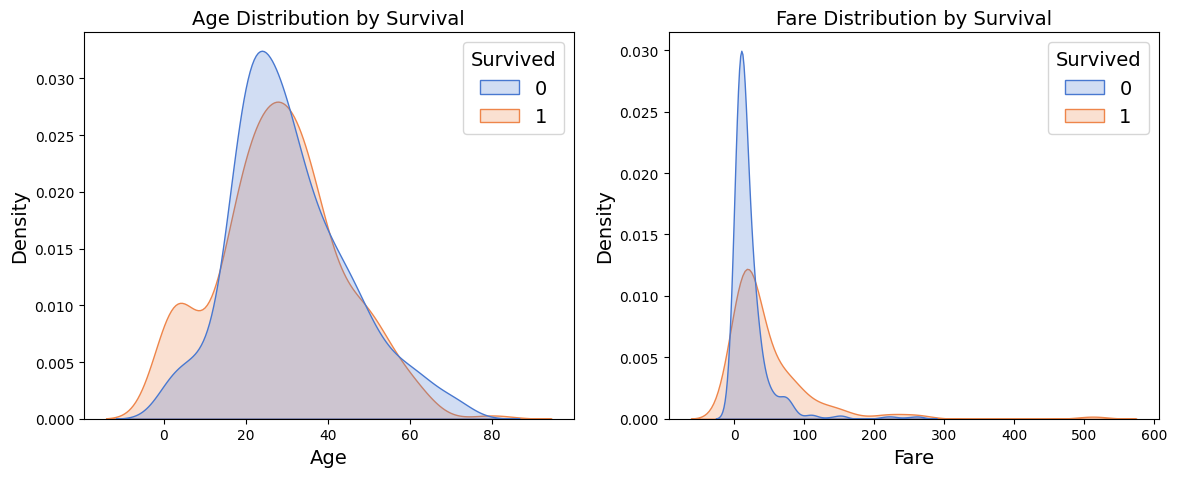

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age distribution
sns.kdeplot(
    data=train_df,
    x='Age',
    hue='Survived',
    common_norm=False,
    fill=True,
    palette='muted',
    ax=axes[0]
)
axes[0].set_title('Age Distribution by Survival')
axes[0].set_xlabel('Age')

# Fare distribution
sns.kdeplot(
    data=train_df,
    x='Fare',
    hue='Survived',
    common_norm=False,
    fill=True,
    palette='muted',
    ax=axes[1]
)
axes[1].set_title('Fare Distribution by Survival')
axes[1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

In [17]:
# --- Define Custom Transformer for Cleaning & Feature Engineering ---

class TitanicPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.fare_imputer_values_ = X.groupby('Pclass')['Fare'].median()
        ticket_prefix_mode = X['Ticket'].apply(self._get_ticket_prefix).mode()[0]
        self.ticket_prefix_mode_ = ticket_prefix_mode
        return self

    def _get_ticket_prefix(self, x):
        items = str(x).split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])

    def _get_ticket_number(self, x):
        num = str(x).split(" ")[-1]
        return int(num) if num.isdigit() else 0

    def transform(self, X):
        df = X.copy()

        # --- Fare Imputation ---
        if 'Fare' in df.columns and df['Fare'].isna().any():
            df['Fare'] = df.apply(lambda row: self.fare_imputer_values_[row['Pclass']] if pd.isna(row['Fare']) else row['Fare'], axis=1)

        # --- Embarked Imputation ---
        embarked_mode = df['Embarked'].mode()[0]
        df['Embarked'] = df['Embarked'].fillna(embarked_mode)

        df['Ticket_prefix'] = df['Ticket'].apply(self._get_ticket_prefix)

        df['Ticket_prefix'] = df['Ticket_prefix'].fillna(self.ticket_prefix_mode_)

        df['Ticket_number'] = df['Ticket'].apply(self._get_ticket_number)

        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
        df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
        df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
        df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

        df.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], inplace=True)

        return df

In [18]:
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']
X_test = test_df

In [19]:
numeric_features = ['Age', 'Fare', 'FamilySize', 'Ticket_number']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Ticket_prefix']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # If Missing
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

final_pipeline = Pipeline(steps=[
    ('feature_engineer', TitanicPreprocessor()),
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [20]:
final_pipeline.fit(X_train, y_train)

feature_engineer = final_pipeline.named_steps['feature_engineer']
preprocessor     = final_pipeline.named_steps['preprocessor']

X_train_transformed = preprocessor.transform(feature_engineer.transform(X_train))

In [21]:
featureNames = preprocessor.get_feature_names_out()
dfTrainPrep = pd.DataFrame(X_train_transformed, columns=featureNames, index=X_train.index)
dfTrainPrep.head()

,num__Age,num__Fare,num__FamilySize,num__Ticket_number,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,...,cat__Ticket_prefix_SOTON/O.Q.,cat__Ticket_prefix_SOTON/O2,cat__Ticket_prefix_SOTON/OQ,cat__Ticket_prefix_STON/O2.,cat__Ticket_prefix_STON/O_2.,cat__Ticket_prefix_SW/PP,cat__Ticket_prefix_W./C.,cat__Ticket_prefix_W.E.P.,cat__Ticket_prefix_W/C,cat__Ticket_prefix_WE/P
0,-0.523388,-0.878820,0.836696,-0.567893,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.685109,1.336651,0.836696,-0.646444,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.208093,-0.790065,-0.791007,2.227801,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.468033,1.067352,0.836696,0.219989,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.468033,-0.774439,-0.791007,0.864762,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dfTrainPrep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num__Age                        891 non-null    float64
 1   num__Fare                       891 non-null    float64
 2   num__FamilySize                 891 non-null    float64
 3   num__Ticket_number              891 non-null    float64
 4   cat__Pclass_1                   891 non-null    float64
 5   cat__Pclass_2                   891 non-null    float64
 6   cat__Pclass_3                   891 non-null    float64
 7   cat__Sex_female                 891 non-null    float64
 8   cat__Sex_male                   891 non-null    float64
 9   cat__Embarked_C                 891 non-null    float64
 10  cat__Embarked_Q                 891 non-null    float64
 11  cat__Embarked_S                 891 non-null    float64
 12  cat__Title_Master               891 

In [23]:
dfTrainPrep.describe() # Mean: 0 Std: 1

,num__Age,num__Fare,num__FamilySize,num__Ticket_number,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,...,cat__Ticket_prefix_SOTON/O.Q.,cat__Ticket_prefix_SOTON/O2,cat__Ticket_prefix_SOTON/OQ,cat__Ticket_prefix_STON/O2.,cat__Ticket_prefix_STON/O_2.,cat__Ticket_prefix_SW/PP,cat__Ticket_prefix_W./C.,cat__Ticket_prefix_W.E.P.,cat__Ticket_prefix_W/C,cat__Ticket_prefix_WE/P
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.000000,-1.644775e-17,-3.588600e-17,3.987333e-18,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,...,0.008979,0.002245,0.007856,0.006734,0.013468,0.001122,0.010101,0.001122,0.001122,0.002245
std,1.000562,1.000562e+00,1.000562e+00,1.000562e+00,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,...,0.094383,0.047351,0.088337,0.081830,0.115332,0.033501,0.100051,0.033501,0.033501,0.047351
min,-2.600622,-3.534079e+00,-7.910075e-01,-3.243229e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.523388,-7.919073e-01,-7.910075e-01,-7.325603e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.054196,-1.891020e-01,-7.910075e-01,2.121130e-01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468033,5.594584e-01,8.366964e-01,8.227137e-01,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.452635,2.971192e+00,1.833135e+00,2.227809e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


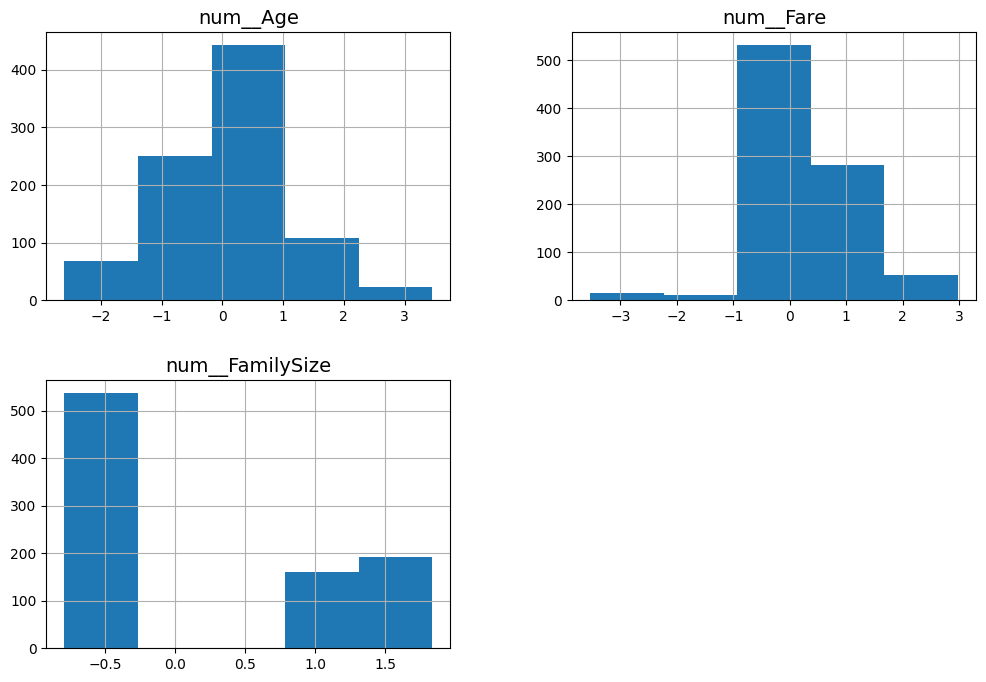

In [24]:
dfTrainPrep.iloc[:, 0:3].hist(bins=5, figsize=(12, 8))
plt.show()

In [ ]:
# Best Params We Got Before
gbc_best = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=42
)

rfc = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    random_state=42
)

log_reg = LogisticRegression(
    C=1.0,
    penalty='l2',
    max_iter=1000,
    random_state=42
)

voting_pipeline = Pipeline(steps=[
    ('feature_engineer', TitanicPreprocessor()),
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators=[('gbc', gbc_best), ('rfc', rfc), ('log_reg', log_reg)],
        voting='soft'
    ))
])

print("Evaluating the new VotingClassifier pipeline...")
scores = cross_val_score(voting_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Ensemble Mean Accuracy: {scores.mean():.4f} (Std: {scores.std():.4f})")

voting_pipeline.fit(X_train, y_train)
final_predictions = voting_pipeline.predict(test_df)

submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': final_predictions})
submission_df.to_csv('submission.csv', index=False)
print("submission file created successfully!")

Evaluating the new VotingClassifier pipeline...
Ensemble Mean Accuracy: 0.8350 (Std: 0.0254)
submission file created successfully!
